<a href="https://colab.research.google.com/github/sket12/python-notebook/blob/master/Seconde_Algorithme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nombre et calculs


## Manipuler les nombres réels

### Déterminer par balayayge un encadrement de $ \sqrt{2}$  d'amplitude inférieure ou  égale à  $10^{-n}$

On commence par s'intérésser à la définition de  $\sqrt{2}$ , on sait que c'est la solution de $x^2=2$ ce qui est équivalent à dire que c'est la solution de $x^2-2=0$. 

On peut alors balayer les valeurs de $x^2-2$  pour $x$ variant entre deux valeurs avec un pas donné et  adaptable pour trouver "0"

Une remarque simple pour démarrer est que  si $x=0$ alors $x^2-2=-2$ et si $x=3$ alors $x^2-2=7$ et donc une solution possible de $x^2-2=0$ est pour une valeur de $x$ entre les deux.

On commence par calculer les valeurs de $x^2-2=7$ pour "x" variant entre 0 et 3 pour un "pas donné

In [0]:
def valeurs_x_y(pas):#calcul deux listes de valeurs contenant les abscissses et les ordonnées
    x=0
    list_valeur_x=[]#liste des abscisses
    list_valeur_y=[]#liste des ordonnées
    while x<=3:#boucle de parcours en avançant sur "x" par l'ajout du pas
        valeur_x,valeur_y=x,x**2-2# affecte les valeurs dans les variables
        list_valeur_x.append(valeur_x)#ajoute l'abscisse à la suite des abscisses
        list_valeur_y.append(valeur_y)#ajoute l'ordonnée à la suite des ordonnée
        x=x+pas
    return list_valeur_x,list_valeur_y# renvoie les listes dans un tuple

Puis on fait fonctionner le module pour obrenir les valeurs des abscisses et des ordonnées.

In [0]:
valeurs_x_y(1)#là le pas est de 1

([0, 1, 2, 3], [-2, -1, 2, 7])

Et donc on obtient deux listes , une qui contient les abscisses et l'autre les ordonnées. Mais c'est pas forcément simple à lire .. Surtout si le pas est petit

On peut obtenir un graphique de ces valeurs  pour cela on utilise la bibliothèque "matplotlib" et on va chercher les valeurs dans le module "valeurs_x_y"

In [0]:
import matplotlib.pyplot as plt#c'est la biblio des graphiques que l'on décide d'appeler plt
def tracer(pas):
    plt.axis([0.0, 3.0, -2.0, 7.0])#là on définit xmin,xmax,ymin,ymax pour le graphique
    plt.grid(True)#on construit la grille
    plt.plot((valeurs_x_y(pas))[0],(valeurs_x_y(pas))[1])#là on récupère les tuples  de valeurs_x_y
    plt.ylabel('Ordonnées')
    plt.xlabel('Abscisses')
    plt.show()#c'est lméthode de matplotlib pour dessiner

On trace alors avec le même pas 

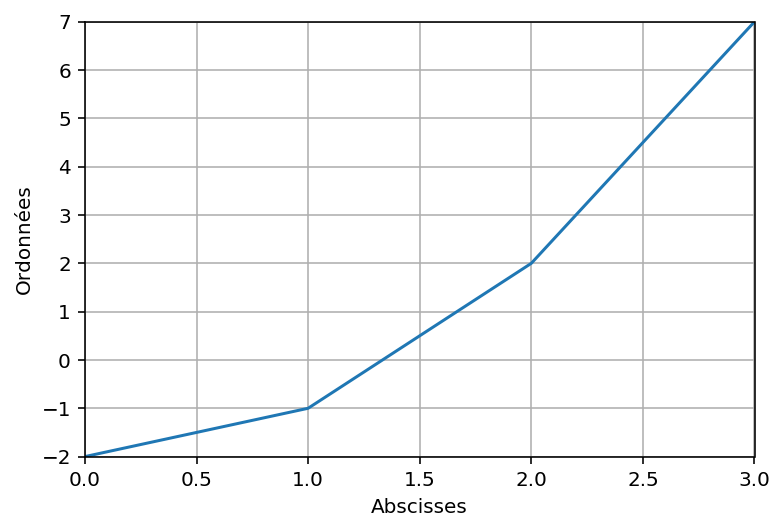

In [0]:
tracer(1)#trace avec les valeurs calculées pour un pas donné

Suer ce graphique on peut se rendre compte que l'équation $x^2-2=0$ a bien une solution et de sa position sur l'axe des abscisses.

Mais on peut être plus précis , changeant le pas .. il suffit de relancer les modules "tracer(pas)" et "valeurs_x_y(pas)" avec des valeurs de pas différents. Par exemple :

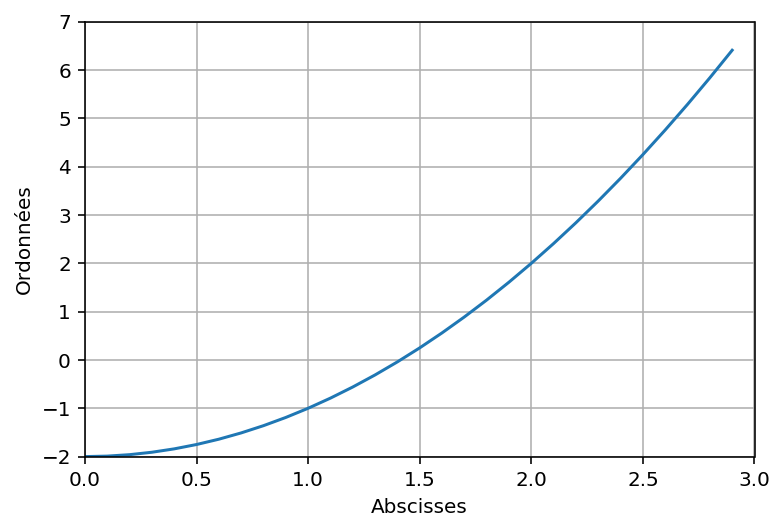

In [0]:
tracer(0.1)#ici le pas est de 0,1

On voit bien que la solution est entre 1 et 2..

Le problème c'est que l'on a  pas beaucoup d'information supplémentaires par le graphique cela vient du fait que les valeurs "max" et "min" de "x" et "y" ne sont pas optimisés à cette échelle.
On va donc récrire les modules "valeurs_x_y" et "tracer" en tenant compte de ce problème.

In [0]:
#C'est la même que la précédente mais on a ajouté xmin,xmax,ymin,ymax
def valeurs_x_y_2(pas,xmin,xmax,ymin,ymax):
    x=xmin
    list_valeur_x=[x] ;list_valeur_y=[x**2-2] #Initialisation des listes de coordonnées
    
    # Boucle de calcul des coordonnées
    while x<=xmax:
        x=x+pas
        list_valeur_x.append(x)
        list_valeur_y.append(x**2-2)
        
    return list_valeur_x,list_valeur_y # On retourne deux listes ( 0 et 1 ) avec les coordonnées

In [0]:
import matplotlib.pyplot as plt
def tracer_2(pas,xmin,xmax,ymin,ymax):
    plt.axis([xmin, xmax,ymin,ymax])
    plt.grid(True)
    plt.plot((valeurs_x_y_2(pas,xmin,xmax,ymin,ymax))[0],(valeurs_x_y_2(pas,xmin,xmax,ymin,ymax))[1])
    plt.ylabel('Ordonnées')
    plt.xlabel('Abscisses')
    plt.show()

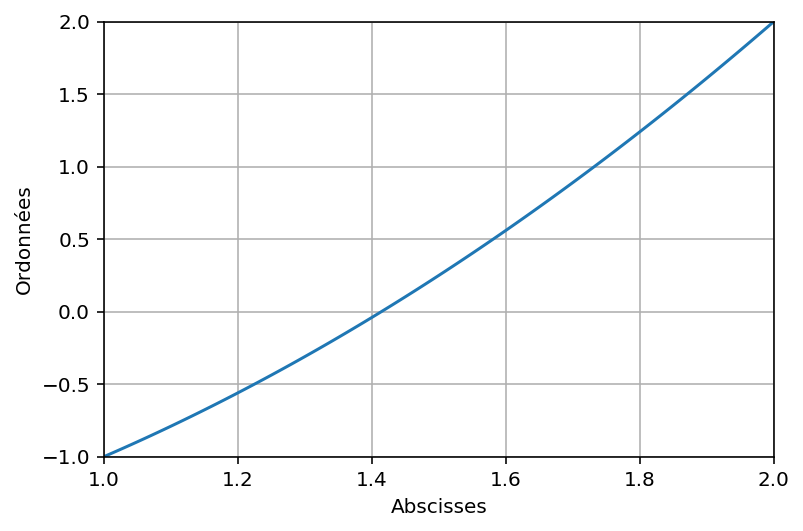

In [0]:
tracer_2(0.01,1,2,-1,2)#ici le pas c'est 0,01 xmin=1,xmax=2, ymin=-1,ymax=2

     On peut continuer en faisant des observations sur le graphique et en lançant à nouveau les modules.

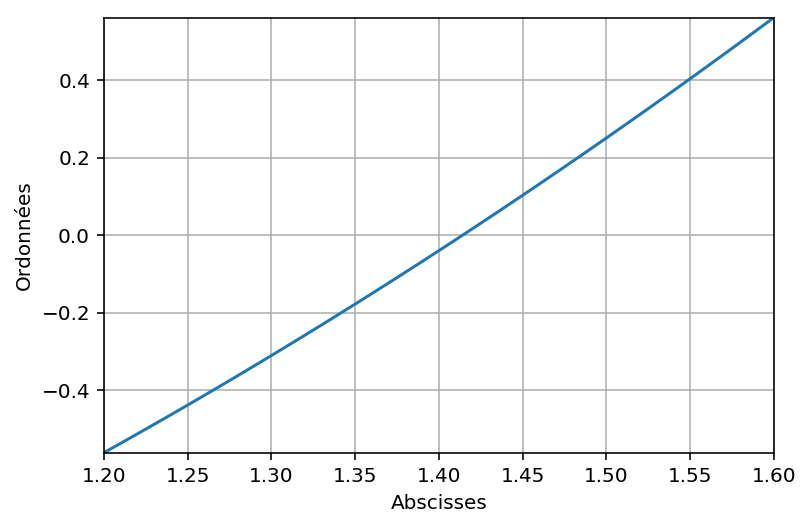

In [0]:
tracer_2(0.01,1.2,1.6,1.2*1.2-2,1.6*1.6-2)

    On peut recommencer... 

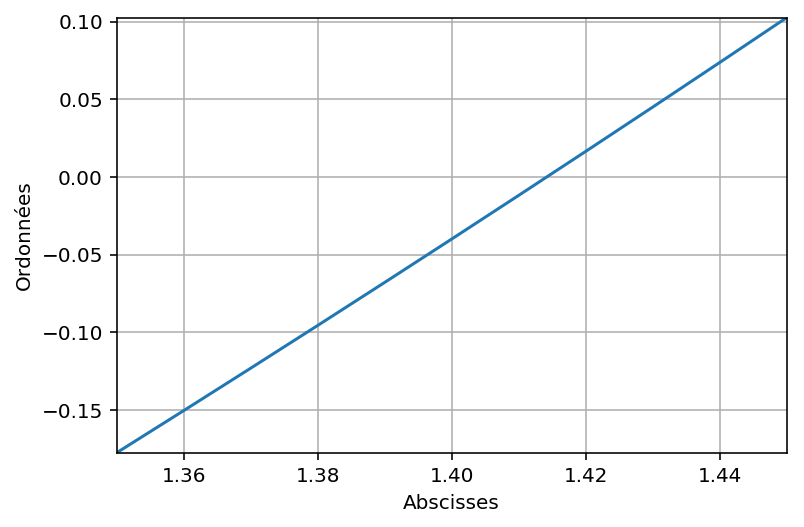

In [0]:
tracer_2(0.01,1.35,1.45,1.35*1.35-2,1.45*1.45-2)

   Pour se simplifier le travail on peut poser une fonction égale à $x^2-2$ 

In [0]:
def f(x):
    return x**2-2

Puis on rapelle la fonction "tracer_2" en utilisant cette fonction.

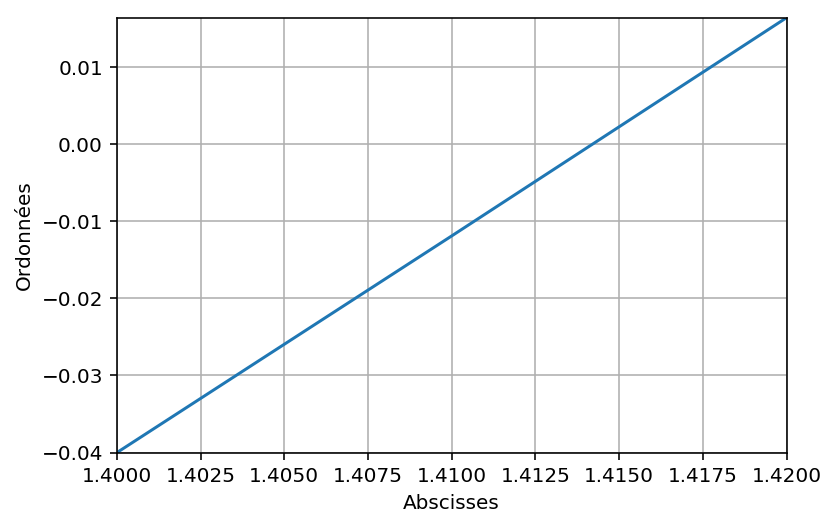

In [0]:
tracer_2(0.01,1.4,1.42,f(1.4),f(1.42))

On poursuit ..Mais au vue des infos portée sur les abscisses , on augmente le pas ..

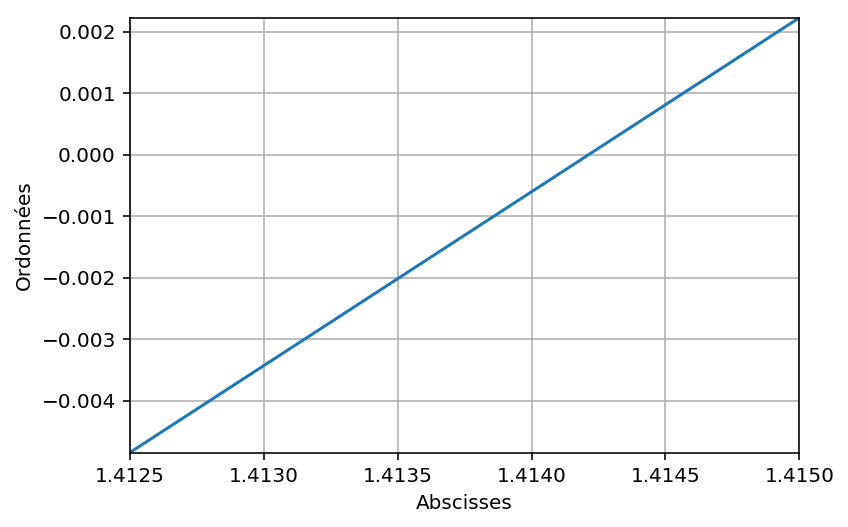

In [0]:
tracer_2(0.0001,1.4125,1.4150,f(1.4125),f(1.4150))

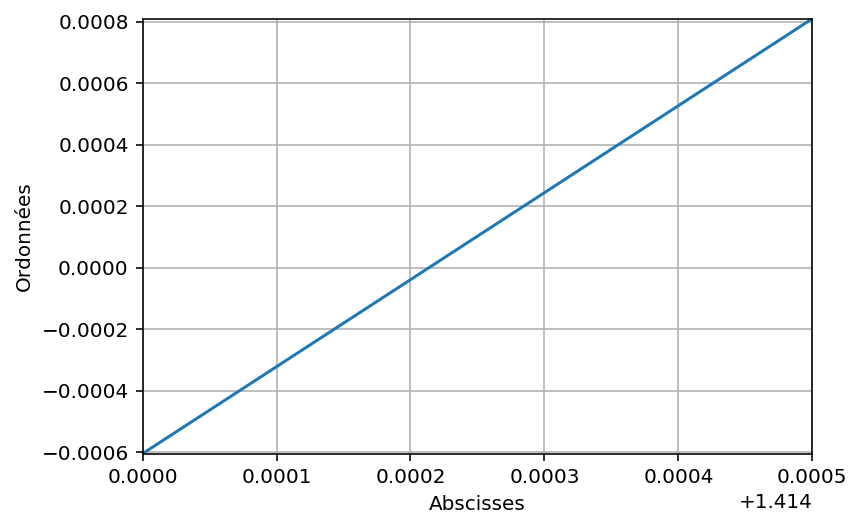

In [0]:
tracer_2(0.0001,1.4140,1.4145,f(1.4140),f(1.4145))

On peut alors modifier le calcul des valeurs pour que les abscisses et les ordonnées soient cote à cote dans l'affichage.
Pour cela on modifie valeurs_x_y_2 en changeant de nom.

In [0]:
def valeurs_x_y_3(pas,xmin,xmax,ymin,ymax):
    x=xmin
    list_valeur_x_y=[]
    while x<=xmax:
        valeur_x_y=x,f(x)#c'est la même formule mais en utilisant la fonction 
        list_valeur_x_y.append(valeur_x_y)# la liste contien x et f(x)
        x=x+pas
    return list_valeur_x_y

In [0]:
valeurs_x_y_3(0.0001,1.4140,1.4145,f(1.4140),f(1.4145))

[(1.414, -0.000604000000000271),
 (1.4141, -0.00032119000000019327),
 (1.4142, -3.836000000023709e-05),
 (1.4143, 0.00024448999999959753),
 (1.4143999999999999, 0.0005273599999995326),
 (1.4144999999999999, 0.0008102499999997903)]

Et on lit que  $f(x)=x^2-2=0$ pour $x$ entre 1,4142 et 1,4143

On peut enfin aborder le problème autrement. 

Et se demander si on peut atteindre une valeur approchée de  $\sqrt{2}$ pour cela on va évaluer $f(x)=x^2-2$ et chercher à savoir si cette quantité change de signes lorsque $x$ parcourt un intervalle donné avec un pas de $10^{-n}$ pour un "n" donné. 



In [0]:
def précision(n,xmin,xmax):# n est la puissance négatve de la précision
    x=xmin
    
    #boucle qui parcourt k'intervalle jusqu'à ce qu'à un changement de signe
    while x<xmax and f(x)*f(x+pow(10,-n))>0:
        x=x+pow(10,-n)
    if x>=xmax:
        reponse="pas de solution dans cet intervalle"
    if x<xmax:
        reponse=x,x+pow(10,-n) # La réponse est deux valeurs qui encadre la réponse 
    return reponse

In [0]:
précision(4,1,3)#ici 6 indique la puissance négative de 10, qui définit la précision

(1.4141999999999544, 1.4142999999999544)

---
---

## Utiliser les notions de multiple , diviseur et de nombre premier

### 1°) Déterminer si un entier a et multiple d'un entier b

    On se donne donc deux entiers "a" et "b" et on cherche à savoir si "a" est un multiple de "b"        
    Or c'est le cas il existe un entier "k" tel que a=kxb. 

    Il y a plusiers manières de faire.
    
    La première consiste à déterminer tous les multiples de b en faisant apparaître la table de multiplication de  "b" et à chercher à savoir si "a" est dedans...
    Mais la liste des multiples de "b" est infini ce qui n'est pas pratique  à gérer avec un ordinateur.
    
    Par contre si a est multiple de "b" il est équivalent de dire que "b" est un diviseur de "a" . 
    
    Et la liste des diviseurs , elle , elle est finie..

In [0]:
def multiple(a,b):#défini la liste des diviseurs et vérifie que b est dans cette liste
    reponse=""
    Liste_div_a = []  # Liste_div est une liste qui contient les diviseurs de "a"
    candidat = 1  # candidat passe en revu tous les nombres entiers  inférieurs à "a" en commençant par "1"
    while candidat <= a:  # dans cette boucle on ne retient des candidat que  ceux qui sont des diviseurs
        if a % candidat == 0:  #calcul le reste de la divison de "n" par "candidat"
            Liste_div_a.append(candidat)  # l'ajoute à la liste des diviseurs
        candidat = candidat + 1
    if b in Liste_div_a:#on teste si b est dans la liste des diviseurs de a
        reponse="oui s'en est un"
    else:
        reponse=" et non.."
    return b,Liste_div_a,reponse #on affiche "b" , la liste des diviseurs de "a" et la réponse 

In [0]:
multiple(156,5)# lance la procédure prépcédente et doinc renvoie la liste des divisersu et la réponse

(5, [1, 2, 3, 4, 6, 12, 13, 26, 39, 52, 78, 156], ' et non..')

---

### 2°)Déterminer le plus grand multiple de "a" inférieur ou égal à b.

    Il suffit de parcourir les multiples de "a" tant qu'on ne dépasse pas "b" ou que l'on est  égal à "b"

In [0]:
def plus_grand_mult(a,b):
    k=0
    mult_a=k*a#En fait "0" est multiple de tous les nombres
    list_mult_a=[]# c'est la liste des multiples
    while mult_a<=b:#on parcourt la liste tant que le multiple de a est plus petit ou égal à "b"
        list_mult_a.append(mult_a)#on construit la liste de smultiples
        k=k+1
        mult_a=k*a#calcul le multiple suivant
    if b in list_mult_a:
        reponse="il est dans la liste"
    else:
        reponse="il n'y est pas",
    return b,list_mult_a[len(list_mult_a)-1],list_mult_a,reponse#on renvoie b, le dernier élément de la liste la liste des multiples et dit si b est dans la liste

In [0]:
plus_grand_mult(5,21)# on cherche à connaître le plus grand multiple de 3 inférieur à 21 et savoir si c'est 21

(21, 20, [0, 5, 10, 15, 20], ("il n'y est pas",))

---

### 3°) Déterminer si un nombre est premier

    Pour cela on va commencer par contruire un module qui calcule la liste des diviseurs d'un entier. 
    
    Puis dans un second module on comparera cette liste à la liste qui contient que " 1" et l'entier lui même car si elles sont identiques le nombre est premier.  

In [0]:
def div(n):
    Liste_div = []  # Liste_div est une liste qui contient les diviseurs de "n"
    candidat = 1  # candidat passe en revu les nombres inférieurs à "n"
    while candidat <= n:  # dans cette boucle on ne retient des candidat que  ceux qui sont des diviseurs
        if n % candidat == 0:  #calcul le reste de la divison de "n" par "candidat"
            Liste_div.append(candidat)  # l'ajoute à la liste des diviseurs
        candidat = candidat + 1
    return Liste_div

In [0]:
def premier_ou_pas(N):# détermine si un nombre "N" et pemier ou pas en comparant sa liste de diviseur à la litse qui ne contient que 1 et lui même
    if div(N)==[1,N]:
        reponse="premier"
    else:
        reponse="pas_premier"
    return (reponse,div(N))# renvoie un tuple qui contient la réponse et la liste des diviseurs

In [0]:
premier_ou_pas(123)

NameError: ignored

---
---

## Utiliser le calcul littéral


### Déterminer la remière puissance d'un nombre donné supérieure ou inférieure à une valeur donnée

    On considère un nombre positif "A" et une valeur "v" données. On va augmenter 
    la puissance de "A" jusqu'à dépasser "v".  

In [0]:
def puiss_inf_sup_val(A,v):#détermine la liste des puissances de A , et la première puissance inférieur et supérieure à "v"
    n=0
    list_puiss=[]#initialise la liste des puissances
    puiss_A=A**n#calcul de la puissance de A
    while puiss_A<=v:#Boucle qui s'arête des que la puissance de "A" dépasse "v"
        list_puiss.append(puiss_A)# contruit la liste des puissances
        n=n+1
        puiss_A=A**n
    
    return list_puiss,list_puiss[len(list_puiss)-1],A**(n+1)# retourne la liste et les deux puissances  : la dernière puissabce inférieur à v et la suivante

In [0]:
puiss_inf_sup_val(2,1299)

NameError: ignored

---
---
---

# Géométrie


## Représenter et caractériser les droites du plan

#### 1°) Etudier l'alignement de trois points du plans

Le module part des coordonnées de 3 poinst et dans un premier temsp on va les dessiner

In [0]:
import matplotlib.pyplot as plt
def aligne(xA,yA,xB,yB,xC,yC):
    x = [xA,xB,xC];y = [yA,yB,yC]
    
    #On contruit les caractéristiques de la figure
    plt.grid(True)#on construit la grille
    plt.title('Points alignés') #On place le titre
    plt.xlabel('Abscisses')
    plt.ylabel('Ordonnées')
    plt.text(xA, yA,'A')
    plt.text(xB, yB,'B')
    plt.text(xC, yC,'C')
    
    plt.scatter(x,y)#trace un nuage de points
    plt.show()

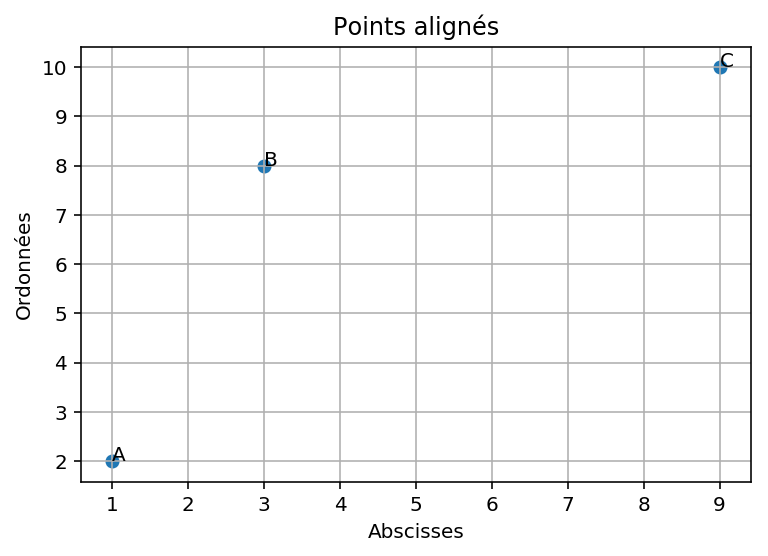

In [0]:
aligne(1,2,3,8,9,10)

    Sur Cette figure on peut constater que les points ne sont pas alignés. 
    Mais on cherche une preuve calculatoire qui permettent de répondre sans ambiguité. 
    Car si on relance la fonction "aligne" avec des points ou l'alignment ne peut pas ou mal se constater 
    on ne peut pas répondre . 
    
    Par exemple : l'oberstion du graphique suivant

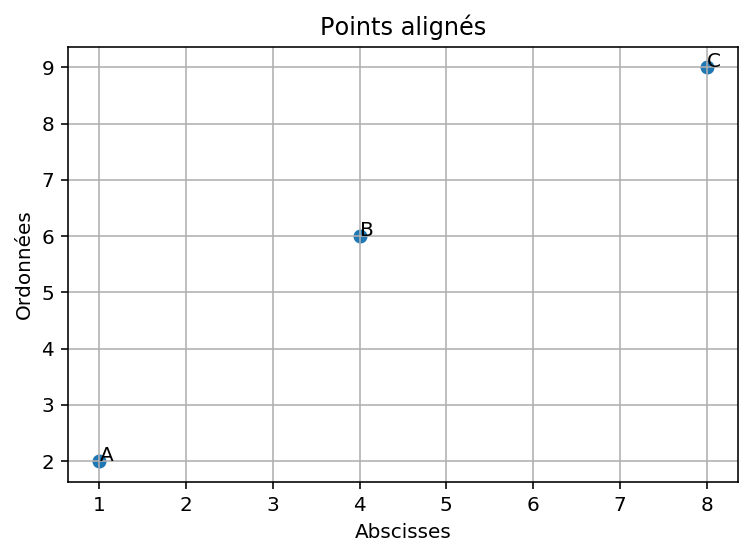

In [0]:
aligne(1,2,4,6,8,9)

    C'est moins net ..
    On peut relier les ppoints pour mieux voir , on modifie notre module précédent

In [0]:
import matplotlib.pyplot as plt
def figure_reli(xA,yA,xB,yB,xC,yC):# trace les points reliés
    x = [xA,xB,xC];y = [yA,yB,yC]
    
    plt.grid(True)#on construit la grille
    plt.title('Figure Points reliés')
    plt.xlabel('Abscisses')
    plt.ylabel('Ordonnées')
    plt.text(xA, yA,'A')
    plt.text(xB, yB,'B')
    plt.text(xC, yC,'C')
    
    plt.plot(x,y)#on trace les ponts en les reliant c'est "plot" qui relie au lieu de "scatter"

    plt.show()

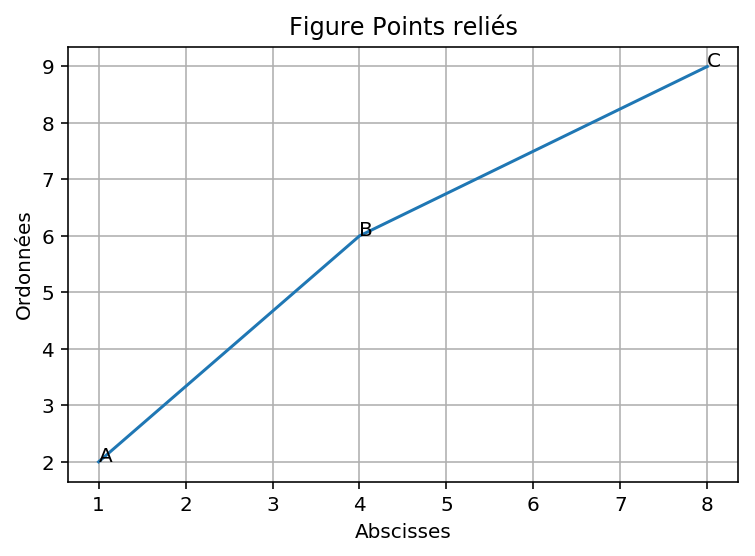

In [0]:
figure_reli(1,2,4,6,8,9)

    Mais si on lance cette commande

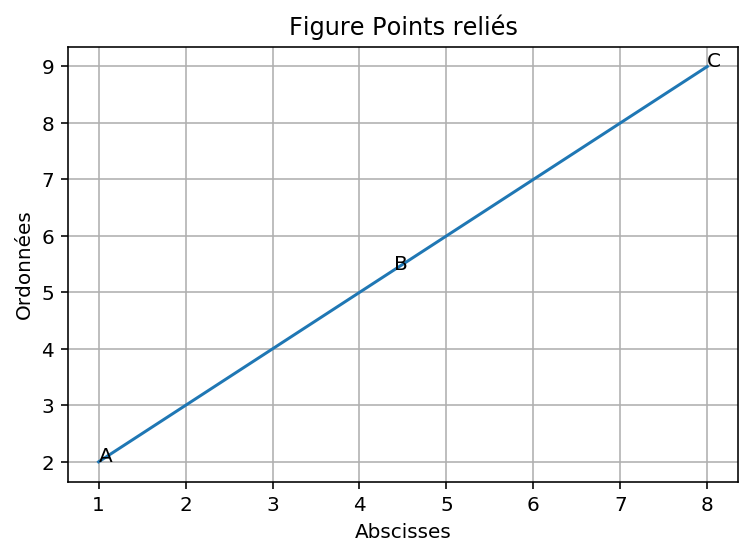

In [0]:
figure_reli(1,2,4.4,5.4,8,9)

    On commence à plus rien voir ... en tout les cas c'est moins clair.
    En observant on ne peut rien déduire

L'idée est de passer par les vecteurs , en cherchant à savoir si $\overrightarrow{AB}$ et
$\overrightarrow{BC}$ sont colinéaires.

On va commencer par écrire un module qui calcule les coordonées d'un vecteur à partir de la donnée des deux coordonnées des points qui le composent

In [0]:
def coord_vect(x1,y1,x2,y2):
    return x2-x1,y2-y1
# attention la sortie est un tuple c'est à dire que l'on récupère les données dans deux listes

In [0]:
coord_vect(2,6,8,9)

(6, 3)

    Puis on va utliser ce module pour étudier la colinéarité de deux vecteurs à artir de la donnée des coordonnées
    des 3 points (A,B,C)

In [0]:
def vect_coli(xA,yA,xB,yB,xC,yC):
    #On récupère les coordonnées des deux vecteurs
    x=coord_vect(xA,yA,xB,yB)[0];y=coord_vect(xA,yA,xB,yB)[0]
    x_=coord_vect(xB,yB,xC,yC)[0];y_=coord_vect(xB,yB,xC,yC)[1]
    
    det=x*y_-y*x_ # Calcul du déterminant
    
    # Test à savoir si le déterminant est nul ou pas
    if det==0:
        reponse="alignés"
    else:
        reponse="non alignés"
    return reponse
    

    On lance ce module avec les coordonnées correpondant au graphique difficile à interpréter.

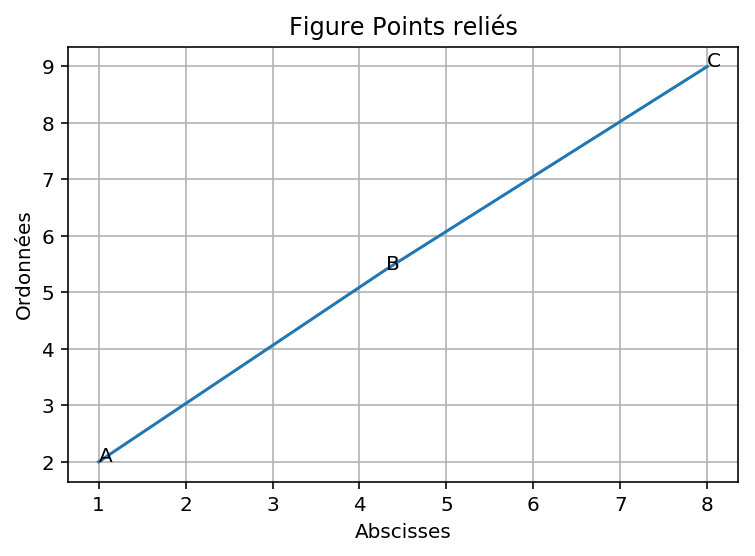

('non alignés', None)

In [0]:
vect_coli(1,2,4.3,5.4,8,9), figure_reli(1,2,4.3,5.4,8,9)

    On voit que le calcul vient au secours de la géométrie.

---

#### 2°)Déterminer une équation de droite passant par deux points

 On se donne deux points A et B de coordonnées (xA,yA) et (xB,yB) , et un point M quelconque sur la droite (AB) , on va commencer par déterminer les coordonnées de $\overrightarrow{AB}$ , qui permettront de déterminer "a" et "b" dans l'équation cartésienne $ax+by+c=0$ . Puis "c" sera déterminé par $c=-axA-byA$

In [0]:
def equ_dr(xA,yA,xB,yB):
    b=-(coord_vect(xA,yA,xB,yB)[0])
    a=coord_vect(xA,yA,xB,yB)[1]
    c=-a*xA-b*yA
    return "a=",a,";b=",b,";c=",c

In [0]:
equ_dr(1,2,4,6)

('a=', 4, ';b=', -3, ';c=', 2)

---
---
---

# Les fonctions


## Fonctions courbes représentatives

### 1°) Pour une fonction dont le tableau de variations est donné, algorithmes d’approximation numérique d’un extremum (balayage, dichotomie).

Etant donné que dans toute la suite on va utiliser des fonctions , on commence par écrire un module qui retourne la valeur d'une fonction pour un $x$ donné

In [0]:
from math import*
def f(x):
    return sin(x)

In [0]:
f(5)  # on peut ainsi calculer la valeur d'une fonction pour un abscisses donné

-0.9589242746631385

    On suppose que l'on dispose du tableau de variation , et que donc on connait entre quelles 
    valeures est placées l'abscisse du miminum ou du maximum. 
    
    On peut dans un premier temps représenter le graphique de la fonction. 
    
    Puis on va juste définir le cadre et le pas pour le calcul des valeurs

In [0]:
def valeurs_x_y_2(pas,xmin,xmax,ymin,ymax):#cette fonction calcul les valeurs abscisses et ordonnées 
                                           #de la fonction
    x=xmin
    list_valeur_x=[x]#initialisation de la liste des abscisses
    list_valeur_y=[f(x)]#initialisation de la liste des ordonnées
    while x<=xmax:
        valeur_x,valeur_y=x,f(x)    #calcul des valeurs
        list_valeur_x.append(valeur_x)  #ajout de abscisses
        list_valeur_y.append(valeur_y)  #ajout de ordonnées
        x=x+pas
    return list_valeur_x,list_valeur_y    #retourne un tuple avec en premier les abscisses et en 
                                      #second les ordonnées
    # Lorsque on le fait tourner le module ne renvoit rien , pour qu'il renvoie quelque chose il faudrait l'appeler

In [0]:
from matplotlib.pyplot import*
def tracer_2(pas,xmin,xmax,ymin,ymax):#cette fonction retourne un graphe en fonction du pas et
                                      #du cadre 
    matplotlib.pyplot.axis([xmin, xmax,ymin,ymax]) # On définit le cadre dans lequel on va fair ele graphique
    matplotlib.pyplot.grid(True) # On trace la grille
    # Dans la ligne ci-dessous on fait appel au module précédent et on récupère les deux
    #listes abscisses et ordonnées dans l'ordre [0] ET [1]
    matplotlib.pyplot.plot((valeurs_x_y_2(pas,xmin,xmax,ymin,ymax))[0],(valeurs_x_y_2(pas,xmin,xmax,ymin,ymax))[1])
    matplotlib.pyplot.ylabel('Ordonnées') #  Le nom des ordonnée
    matplotlib.pyplot.xlabel('Abscisses')  # Le nom des abscisses
    matplotlib.pyplot.show()  # On effectue le tracé

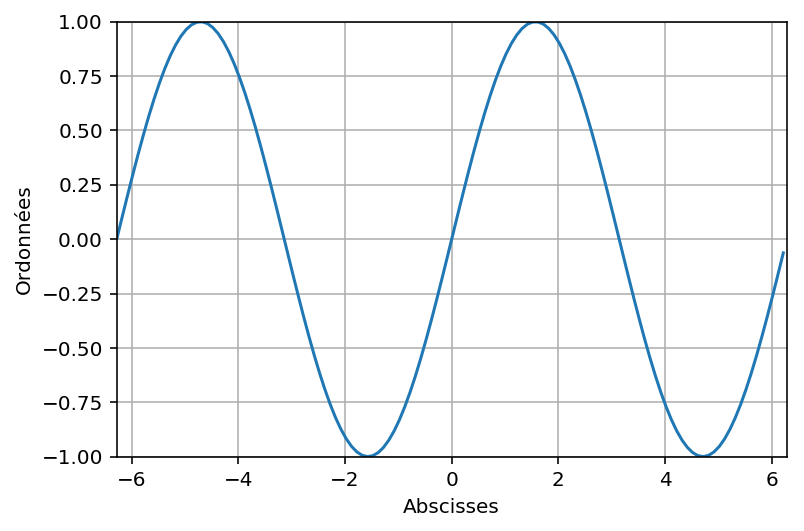

In [0]:
tracer_2(0.1,-2*3.14,2*3.14,-1,1)       #pas,xmin,xmax,ymin,ymax

    On va maintenant chercher un encadrement de l'abscisse du maximum de la fonction sur un intervall (xmin,xmax donné)
    On commence par se donner un encadrement de l'abscisse du max et un pas puis
    
    on va chercher la valeur max sur cet intervalle.
    

In [0]:
def balay_max(n,xmin,xmax):    # Cette fonction balaie l'intervalle xmin, xmax (repéré sur le graphique précédent)
                               #avec un "pas égale 
                               # à (xmax-xmin)/n" et renvoie les valeurs qui encadre le "x" pour lequel 
                               # la fonction est maximum et le max des ordonnées
   
    x=xmin;y=f(x) # On définit les valeurs de départ
    x_list=[x];y_list=[y] # On définit le pas
    
    pas=(xmax-xmin)/n
    
    # La boucle ci-dessous remplit la liste des abscisses et des ordonnées entre xmin et xmax
    while x<=xmax:
        x_list.append(x);y_list.append(y) # On remplit les listes
        x=x+pas;y=f(x) # On avance sur la fonction ets es valerus
        
    max_y=max(y_list) # On place le maximum des ordonnées dans "max_y"
    
    indice_ymax=y_list.index(max(y_list))  # On récupère l'indice dans la liste des ordonnées de celle du max
    val_x_pour_max=x_list[indice_ymax] #On récupère la valeur de x maximum en utilisant l'indice
    
    a=x_list[indice_ymax-1] # On place dans "a" la valeur de l'abscisse iméddiatement inférieur à celle du max
    b=x_list[indice_ymax+1]  # On place dans "a" la valeur de l'abscisse iméddiatement supérieur à celle du max
    
    return a,val_x_pour_max,b,max_y,indice_ymax #,x_list,y_list    

In [0]:
balay_max(10,-6,-2)

(-5.199999999999999,
 -4.799999999999999,
 -4.399999999999999,
 0.9961646088358408,
 4)

In [0]:
balay_max(1000,-5.19,-4.39) # On recommence en affinant 

(-4.713200000000053,
 -4.712400000000053,
 -4.711600000000053,
 0.999999999939284,
 598)

### 2°) Calcul approché de longueur d’une portion de courbe représentative de fonction pour un pas donné.

On considère une courbe d'équation $g(x)=y$ , définie sur un intervalle $[x_{0},x_{1}]$ et on cherche 
à calculer la longueur de la courbe enre les points de coordonnées $(x_{0},f(x_{0});(x_{1},f(x_{1})$

On va commencer par construire le module qui calcul les valeurs de la fonction.

In [0]:
import math
def g(x):
    return -x**3+2*x-2

Puis on commence par représenter la situation sous forme de graphique

In [0]:
def valeurs_x_y_3(pas,xmin,xmax):#cette fonction calcul les valeurs abscisses et ordonnées 
                                           #de la fonction g sur l'intervalle donné
    x=xmin
    list_valeur_x=[]#initialisation de la liste des abscisses
    list_valeur_y=[]#initialisation de la liste des ordonnées
    while x<=xmax:
        valeur_x,valeur_y=x,g(x)#calcul des valeurs
        list_valeur_x.append(valeur_x)#ajout de abscisses
        list_valeur_y.append(valeur_y)#ajout de ordonnées
        x=x+pas
    return list_valeur_x,list_valeur_y#retourne un tuple avec en premier les abscisses et en 
                                      #second les ordonnées

In [0]:
import matplotlib.pyplot
def tracer_3(pas,xmin,xmax):#cette fonction retourne un graphe en fonction du pas et
                                      #du cadre 
    
    matplotlib.pyplot.grid(True)  # Trace la grille
    matplotlib.pyplot.text(xmin,g(xmin),'A') #Place le point A au début de la courbe
    matplotlib.pyplot.text(xmax,g(xmax),'B') # Place le point B à la fin de la courbe
    matplotlib.pyplot.ylabel('Ordonnées') # Nomme l'axe des abscisses
    matplotlib.pyplot.xlabel('Abscisses') # Nomme l'axe des ordonnées
    
    matplotlib.pyplot.plot([xmin,xmax],[g(xmin),g(xmax)]) #Trace le segment [AB] 
    matplotlib.pyplot.plot((valeurs_x_y_3(pas,xmin,xmax))[0],(valeurs_x_y_3(pas,xmin,xmax))[1]) # Trace la courbe
    

    
    matplotlib.pyplot.show()

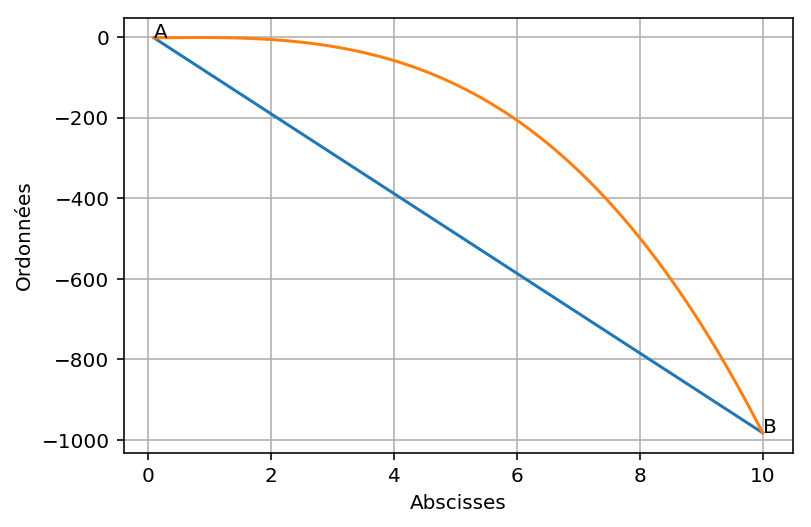

In [0]:
tracer_3(0.1,0.1,10)    # Trace la courbe 

La première idée est de remplacer la longueur de la courbe par la longueur du segment [AB]

In [0]:
import math
def long(xmin,xmax):
    return math.sqrt((xmin-xmax)**2+(g(xmin)-g(xmax))**2)

In [0]:
long(0.1,10)

980.2489936750763

Mais cette solution n'est pas optimale.

On pourrait imaginer répartir des points sur la courbe est faire une somme des longueurs des segments qui relient ces points. 

On commence par calculer les coordonnées de "N" points sur la courbe et à les placer.

In [0]:
import matplotlib.pyplot as plt  # c'est une autre manière d'amener les bibliothèques en leur donnant un nom ici "plt"
def points(pas,N,xmin,xmax):
    
    # On initialise les valeurs
    x=xmin;y=g(xmin)
    x_list=[x];y_list=[y]
    
    # On rempli les listes avec les coordonnées des points en les espacçant régulièrement
    while x<=xmax:
        x=x+(xmax-xmin)/N;y=g(x)
        x_list.append(x);y_list.append(y)
    
    # On trace la grille et les informations du graphique comme précédemment     
    plt.grid(True)
    plt.ylabel('Ordonnées')
    plt.xlabel('Abscisses')
    plt.axis([xmin, xmax,g(xmin),g(xmax)])
    plt.text(xmin,g(xmin),'A')
    plt.text(xmax,g(xmax),'B')
      
    plt.scatter(x_list,y_list) # On trace les points
    plt.plot(x_list,y_list) # On trace les segmesnt entre les points de la liste
    
    # On récupère les valeurs des points de la fonction  et on les trace
    plt.plot((valeurs_x_y_3(pas,xmin,xmax))[0],(valeurs_x_y_3(pas,xmin,xmax))[1])
    plt.plot([xmin,xmax],[g(xmin),g(xmax)])
    
    plt.show() 
    return x_list,y_list # On retourne en ^lus du dessin les listes des coordonnées

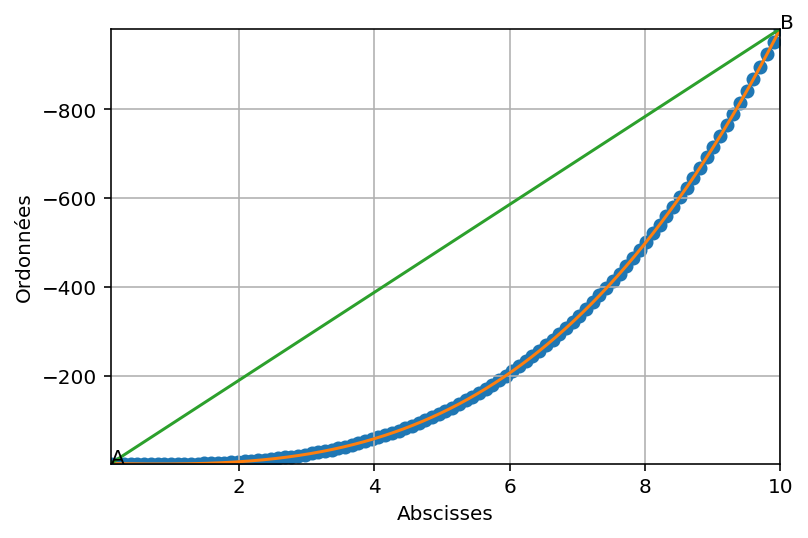

([0.1,
  0.199,
  0.29800000000000004,
  0.397,
  0.496,
  0.595,
  0.694,
  0.7929999999999999,
  0.8919999999999999,
  0.9909999999999999,
  1.0899999999999999,
  1.1889999999999998,
  1.2879999999999998,
  1.3869999999999998,
  1.4859999999999998,
  1.5849999999999997,
  1.6839999999999997,
  1.7829999999999997,
  1.8819999999999997,
  1.9809999999999997,
  2.0799999999999996,
  2.179,
  2.278,
  2.3770000000000002,
  2.4760000000000004,
  2.5750000000000006,
  2.674000000000001,
  2.773000000000001,
  2.872000000000001,
  2.9710000000000014,
  3.0700000000000016,
  3.169000000000002,
  3.268000000000002,
  3.367000000000002,
  3.4660000000000024,
  3.5650000000000026,
  3.664000000000003,
  3.763000000000003,
  3.862000000000003,
  3.9610000000000034,
  4.060000000000003,
  4.159000000000003,
  4.258000000000004,
  4.357000000000004,
  4.456000000000004,
  4.555000000000004,
  4.654000000000004,
  4.7530000000000046,
  4.852000000000005,
  4.951000000000005,
  5.050000000000005,
  

In [0]:
points(0.001,100,0.1,10)

On va alors calculer la longueur de la somme des segments. 

In [0]:
def somme_long(N,xmin,xmax):
    #Initialisation des valeurs
    x=xmin;y=g(xmin)
    x_list=[x];y_list=[y]

    #Calcul des coordonnées des points
    while x<=xmax:
        x=x+(xmax-xmin)/N;y=g(x)
        x_list.append(x);y_list.append(y)
        
    long=0 # Initialisation de la somme des longeurs des segments à 0
    #Boucle de calcul des longueurs en additionnant les valeurs 
    for i in range(0,len(x_list)-1):
        long=long+sqrt(((x_list[i])-(x_list[i+1]))**2+((y_list[i])-(y_list[i+1]))**2)
    return long # On retourne la longueur
    

In [0]:
somme_long(3,0.1,10)

NameError: ignored

---
---
---

# Statistiques et probabilités



### 1°) Pour des données réelles ou issues d’une simulation, lire et comprendre une fonction écrite en Python renvoyant la moyenne m, l’écart type s, et la proportion d’éléments appartenant à [m-2s,m+2s].

On se donné une colonne de données , pour l'instant une série de nombre prises au hasard d'une taille donnée "N".


In [0]:
from random import*
def données(N):
    List=[]
    for i in range(1,N):
        List.append(gauss(0,1))
    return List

    On peut voir la liste piour un "N" donnée

In [0]:
données(10)


[-0.3747749830366397,
 -0.2197270994720639,
 0.8418341505450125,
 -0.8138990436750962,
 -1.125624768031378,
 -2.0881577732011056,
 0.8738328461296417,
 0.08118727005999009,
 2.2480023705127117]

    On cherche ensuite à calculer la moyenne et l'écart type de cette série de donnée

In [0]:
from math import*
def calcul_moy_ecart_list(liste_elem):
    longueur=len(liste_elem)
    somme=sum(liste_elem)
    moy=somme/longueur
    list_diff_carré=[(elem-moy)**2 for elem in liste_elem]
    ecart_type=sqrt(sum(list_diff_carré)/longueur)
    return moy,ecart_type,liste_elem

In [0]:
calcul_moy_ecart_list(données(10))

(-0.05190274074237053,
 0.8541407895514576,
 [-0.3085604201259759,
  0.8365250187922006,
  -0.2911836951631676,
  1.2159214503270965,
  -0.0029736176438709258,
  -1.5099412268348589,
  -0.6991975458745696,
  0.988903908653679,
  -0.6966185388118681])

On cherche à savoir combien de données sont compris autour de la moyenne dans un écart donné;

In [0]:
def interv(liste,c):
    moy=calcul_moy_ecart_list(liste)[0]
    ecart_t=calcul_moy_ecart_list(liste)[1]
    compte=0
    for i in range(0,len(liste)):
        if liste[i]>moy-c*ecart_t and liste[i]<moy+c*ecart_t:
            compte=compte+1
    return moy, ecart_t,compte/len(liste),compte#,len(liste),liste

In [0]:
liste=données(100000)

In [0]:
interv(liste,1.96)

(-0.0025904725837548343, 1.001176206313175, 0.94909949099491, 94909)

### 2°) Lire et comprendre une fonction Python renvoyant le nombre ou la fréquence de succès dans un échantillon de taille n pour une expérience aléatoire à deux issues.

On va simuler le jet de trois dès et on s'intéresse à la somme des trois dés , et on va calculer la fréquence d'apparition lorsque la somme est égale à à un nombre entre 3 et 18 lorsque on jette "N" fois les trois dès

In [0]:
import random
def donnée(N):
    liste_somme=[]
    dés1=[random.randint(1,6) for i in range(N)]
    dés2=[random.randint(1,6) for i in range(N)]
    dés3=[random.randint(1,6) for i in range(N)]
    i=0
    liste_somme=[dés1[i]+dés2[i]+dés3[i] for i in range(N)]
    return liste_somme

In [0]:
def compter(N,a_compter):
    L=donnée(N)
    return L.count(a_compter)/len(L)

In [0]:
L=[compter(100,i) for i in range(3,19)]
U=[i for i in range(3,19)]
L,U

([0.01,
  0.02,
  0.03,
  0.02,
  0.06,
  0.08,
  0.06,
  0.15,
  0.08,
  0.12,
  0.07,
  0.1,
  0.03,
  0.02,
  0.02,
  0.01],
 [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

### 3°) Observer la loi des grands nombres à l’aide d’une simulation sur Python ou tableur.

On va observer la loi des grands nombres sur le jet d'un dés à 6 faces. C'est le cas le plus simple car on connaît la proba.

On va commencer par écrire un module qui simule le jet de dès un certain nombre de fois. 

Puis on va  comparer la fréquence d'apparition d'une face avec la proba correpondante.

In [0]:
import random
def jet(nbr_jet):
    liste_jet=[random.randint(1,6) for i in range(nbr_jet)]
    return liste_jet

In [0]:
def compter(nbr_jet,face):
    L=jet(nbr_jet)
    return L.count(face)/nbr_jet

In [0]:
compter(1000,2)

0.177

---
---
---

# Physique

### 1°) Représenter les positions successives d’un système modélisé par un point lors d’une évolution unidimensionnelle oubidimensionnelle à l’aide d’un langagede programmation.



---

### 2°) Représenterdes vecteurs vitessed’un système modélisé par un point lors d’un mouvementà l’aide d’un langage de programmation.



---

### 3°) Représenterun nuage de points associé à la caractéristique d’un dipôleet modéliser la caractéristique de ce dipôle à l’aide d’un langage de programmation.


---
---
---